# Figure S14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

import glob

import os
import requests
from skimage.filters import threshold_otsu


In [2]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

In [4]:
a = pd.read_csv("Profile_analysis.csv")
a

,um,Gray,Droplet,Ref,Time
0,0.00000,0.0000,0,in,3.972667
1,0.36110,4.4700,0,in,3.972667
2,0.72221,16.3900,0,in,3.972667
3,1.08331,47.8550,0,in,3.972667
4,1.44441,74.5000,0,in,3.972667
...,...,...,...,...,...
548,5.05545,10.9259,11,out,4.010333
549,5.41655,1.8750,11,out,4.010333
550,5.77765,0.6296,11,out,4.010333
551,6.13876,0.0000,11,out,4.010333


In [6]:
b = []
for d in a.groupby(by = ["Droplet", "Ref"]):

    l = d[1][["Droplet", "Ref", "Time"]]

    l["um"] = d[1]["um"]
    l["G"] = (d[1]["Gray"]-d[1]["Gray"].min())/(d[1]["Gray"].max()-d[1]["Gray"].min())

    b.append(l)
df = pd.concat(b, axis=0)



/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_19404/1902116065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["um"] = d[1]["um"]
/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_19404/1902116065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["um"] = d[1]["um"]
/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_19404/1902116065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

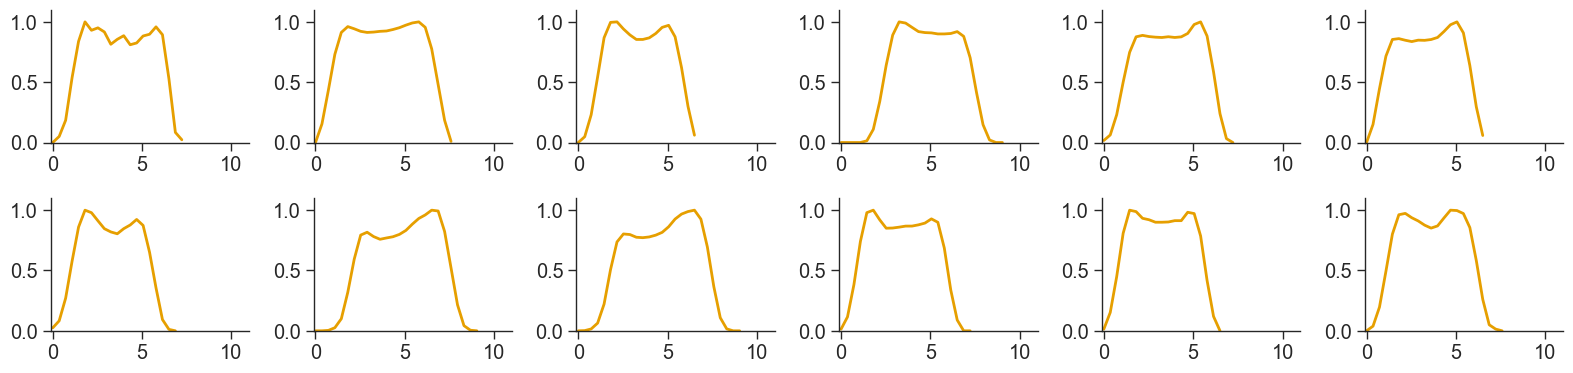

In [9]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize = (16, 4), dpi = 100)
df2 = df.query("Ref == 'in'")

for i, d in enumerate(df2.groupby(by = ["Droplet", "Ref"])):

    # === Plot ===

    sns.lineplot(data = d[1], x = "um", y = "G", errorbar="sd", ax = axs.flatten()[i], lw = 2, legend = None, color="C4")




    # Formatting
    sns.despine(ax=axs.flatten()[i], right=True, top=True)
    axs.flatten()[i].set(
        xticks=np.linspace(0, 10, 3),
        yticks=np.linspace(0, 1.00, 3),
        ylim= (0, 1.10),
        xlim= (-.1, 11),
        xlabel="",
        ylabel=""
    )
    plt.tight_layout()


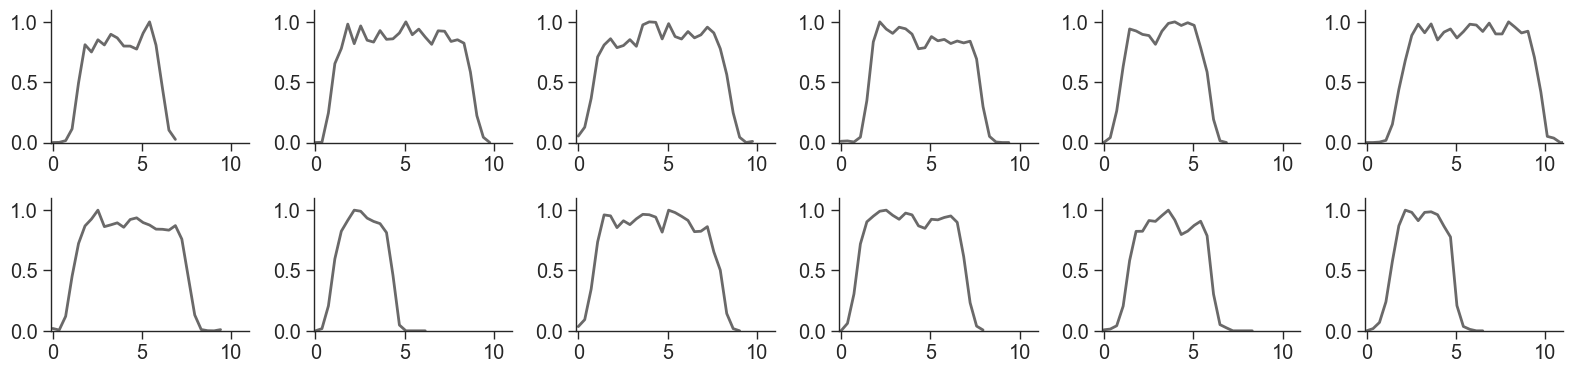

In [10]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize = (16, 4), dpi = 100)
df3 = df.query("Ref != 'in'")

for i, d in enumerate(df3.groupby(by = ["Droplet", "Ref"])):

    # === Plot ===

    sns.lineplot(data = d[1], x = "um", y = "G", errorbar="sd", ax = axs.flatten()[i], lw = 2, legend = None, color="C10")




    # Formatting
    sns.despine(ax=axs.flatten()[i], right=True, top=True)
    axs.flatten()[i].set(
        xticks=np.linspace(0, 10, 3),
        yticks=np.linspace(0, 1.00, 3),
        ylim= (0, 1.10),
        xlim= (-.1, 11),
        xlabel="",
        ylabel=""
    )
    plt.tight_layout()
